# PFRA 

### _Development Notebook_
--- 

### QA/QC
#### Global Errors Check

This notebook is intended to identify global issues in a model simulation that require follow-up responses from the modeler before the model can be used in *STARRII* PFRA studies.

Global issues currently implemented include:
 
 __1. Check Model inputs__
 
    A. Plan Information
    B. Plan Parameters
    C. Boundary Conditions 
     
__2. Check Results for each domain (2D Flow Area) in the model__
 
    A. Computational Summary & Depth Plots
    B. Domain Extents
    C. High Velocities at cell faces
 
 
Global issues *in development* include:
 - Mapping areas where Courant number exceeds indicated threshold.
 - Mapping areas where iteration counts exceed indicated threshold.

In [1]:
import sys;sys.path.append('../')

In [2]:
from hecrasio.core import ResultsZip
from hecrasio.qaqc import *

#### Read model output data 

*from AWS*

In [3]:
model_s3path = "s3://azavea/jwx_test/data/zip/Sacramento_P01_H06_E0001_out.zip"
model = ResultsZip(model_s3path, require_prj=False)

In [4]:
hdfResults_paths = [f for f in model.contents if '.hdf' in f]
assert len([f for f in model.contents if '.hdf' in f]) == 1, "Check files...too many hdf's found"

In [5]:
hdfResults_path = hdfResults_paths[0]
hdfResults_path

'Sacramento_P01_H06_E0001_out/Sacramento_P01_H06_E0001.p07.hdf'

In [6]:
rasPlan = HDFResultsFile(model, hdfResults_path)

### 1A. Plan Information

In [7]:
rasPlan.Plan_Information

,Results
Base Output Interval,15MIN
Computation Time Courant Method,Representative Length/Velocity
Computation Time Step Base,1MIN
Computation Time Step Count To Double,4
Computation Time Step Max Courant,2.5
Computation Time Step Max Doubling,2
Computation Time Step Max Halving,2
Computation Time Step Min Courant,0.45
Flow Filename,Sacramento_P01_H00.u0
Flow Title,E0001


### 1B. Plan Parameters

In [8]:
rasPlan.Plan_Parameters

,Results
1D Cores,0
1D Methodology,Finite Difference
1D2D Flow Tolerance,0.1
1D2D MaxIter,0
1D2D Minimum Flow Tolerance,1
1D2D WS Tolerance,0.01
2D Boundary Condition Ramp Up Fraction,"[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ..."
2D Boundary Condition Volume Check,"[b'False', b'False', b'False', b'False', b'Fal..."
2D Cores,0
2D Coriolis,False


### 1C. Boundary Conditions 

#### Input hydrographs

"Unable to open object (object 'Stage Hydrographs' doesn't exist)"
"Unable to open object (object 'Stage Hydrographs' doesn't exist)"
"Unable to open object (object 'Stage Hydrographs' doesn't exist)"
"Unable to open object (object 'Stage Hydrographs' doesn't exist)"
"Unable to open object (object 'Stage Hydrographs' doesn't exist)"
"Unable to open object (object 'Stage Hydrographs' doesn't exist)"
"Unable to open object (object 'Stage Hydrographs' doesn't exist)"
"Unable to open object (object 'Stage Hydrographs' doesn't exist)"
"Unable to open object (object 'Stage Hydrographs' doesn't exist)"
"Unable to open object (object 'Stage Hydrographs' doesn't exist)"
"Unable to open object (object 'Stage Hydrographs' doesn't exist)"
"Unable to open object (object 'Stage Hydrographs' doesn't exist)"
"Unable to open object (object 'Stage Hydrographs' doesn't exist)"
"Unable to open object (object 'Stage Hydrographs' doesn't exist)"


/home/jwall/anaconda3/envs/geos/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


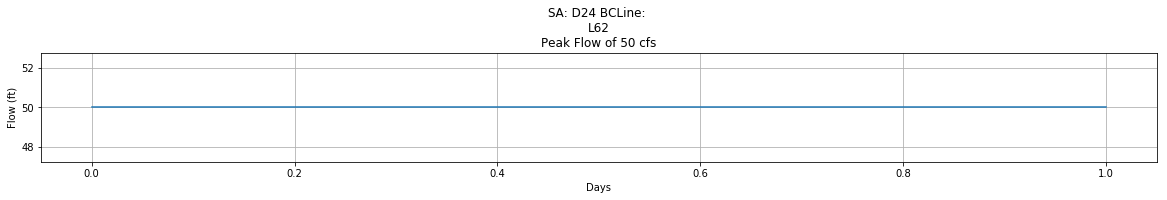

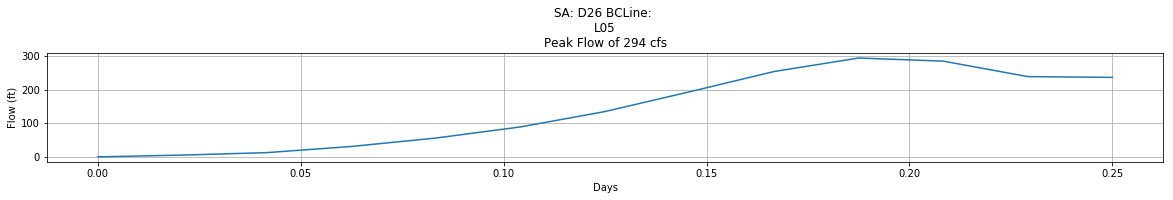

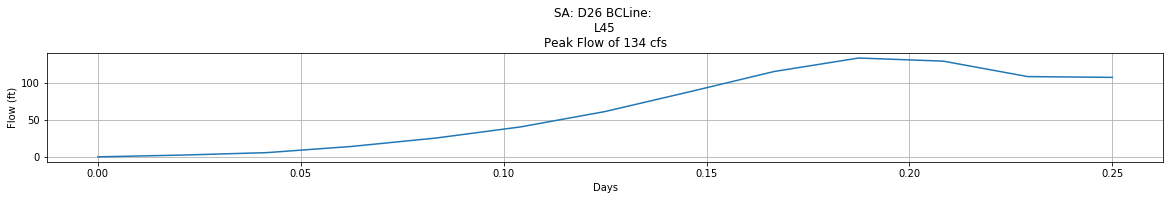

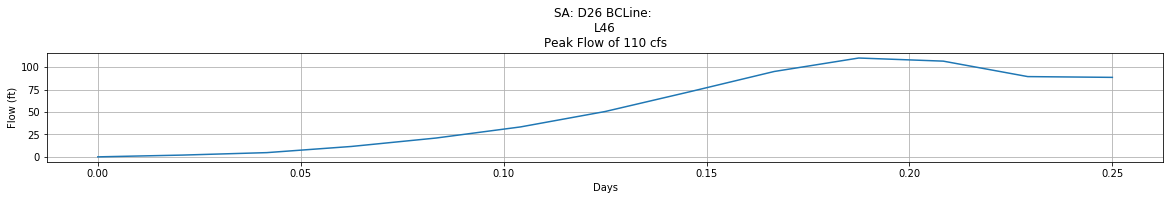

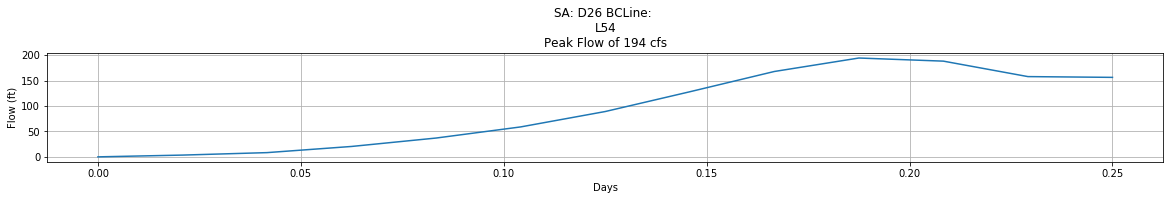

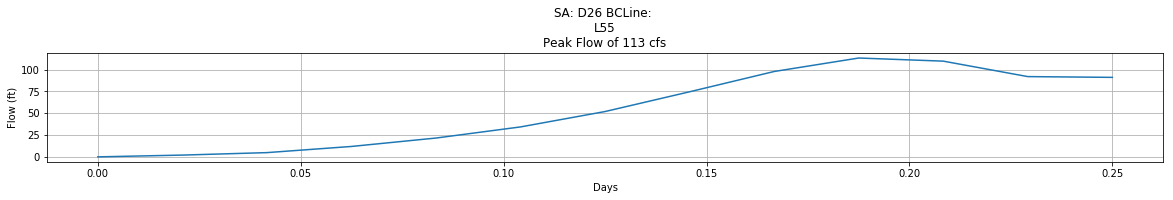

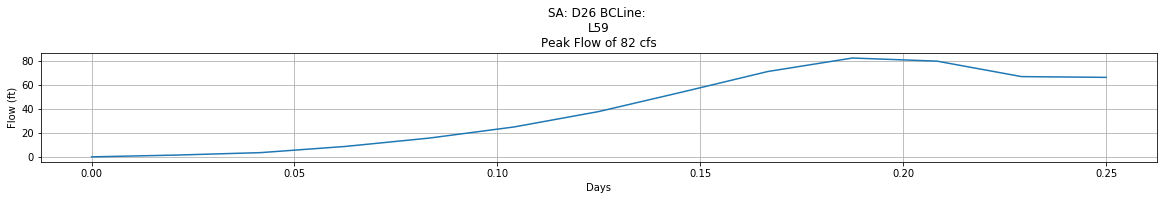

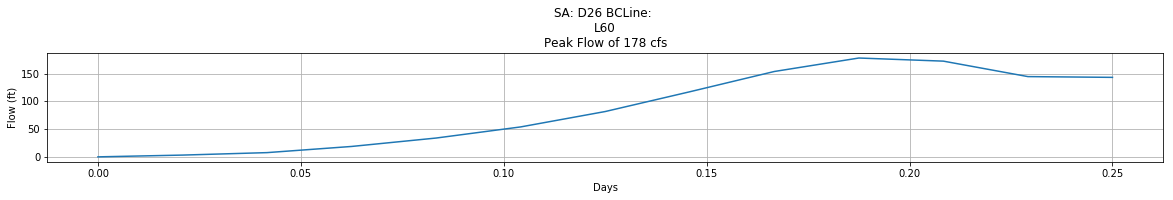

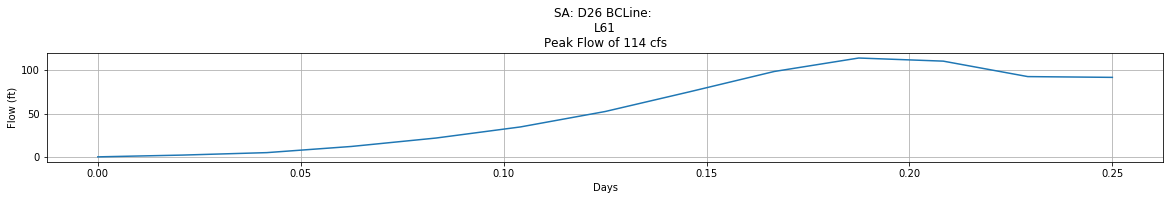

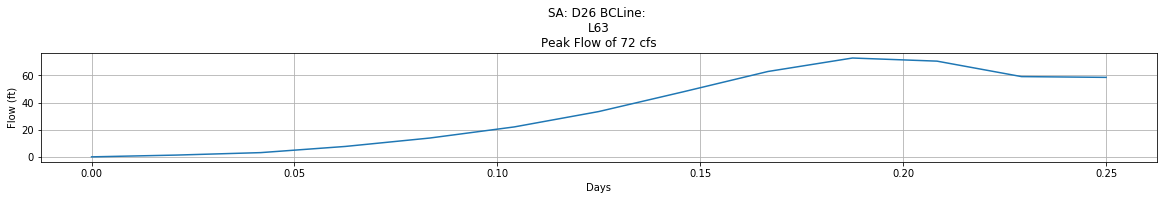

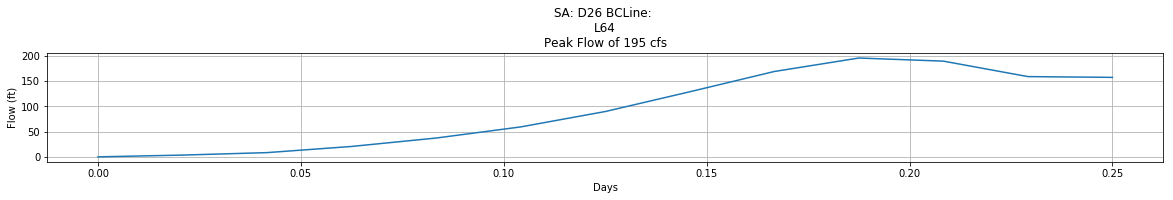

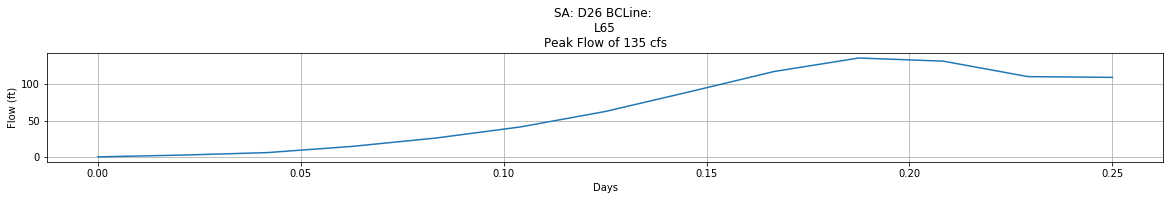

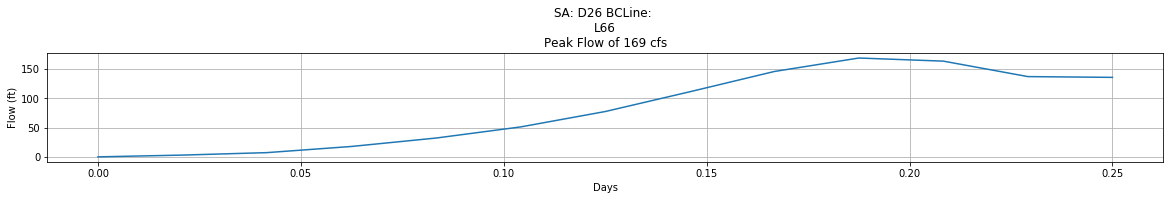

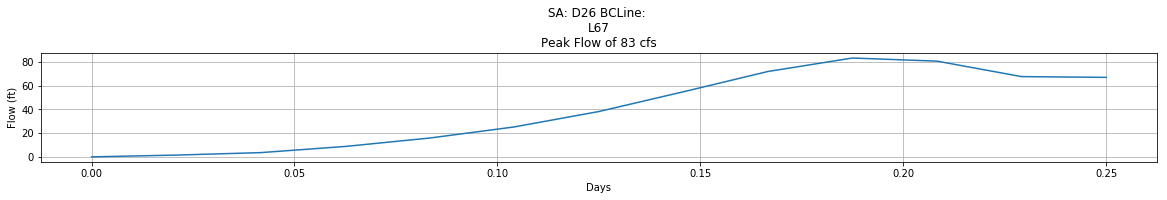

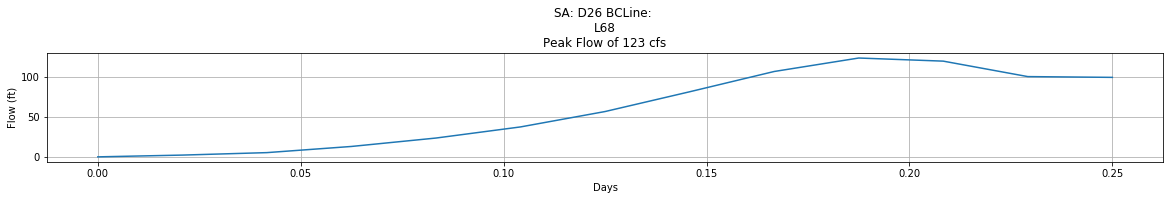

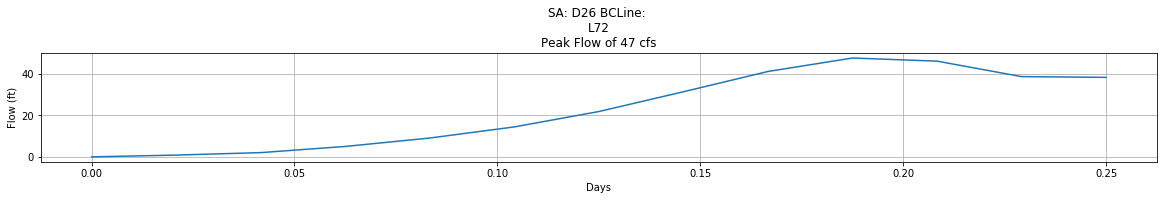

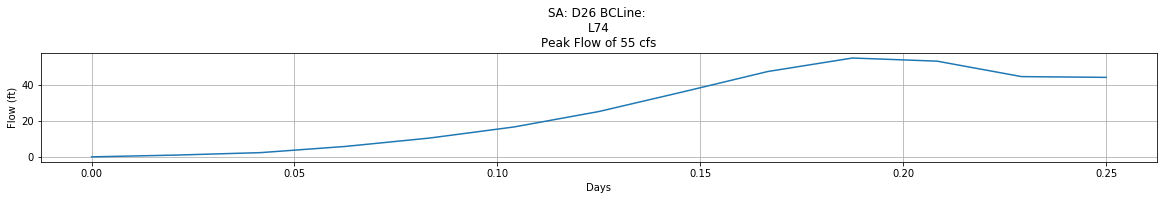

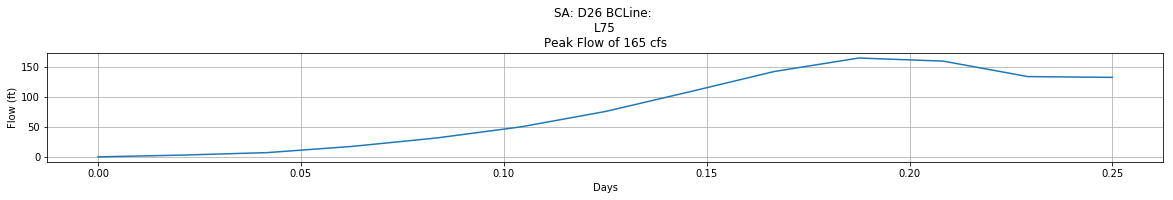

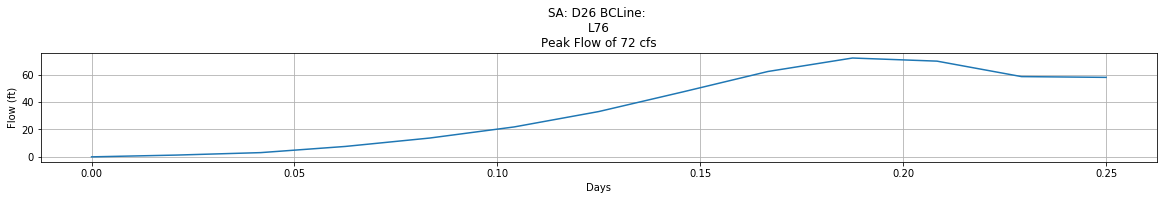

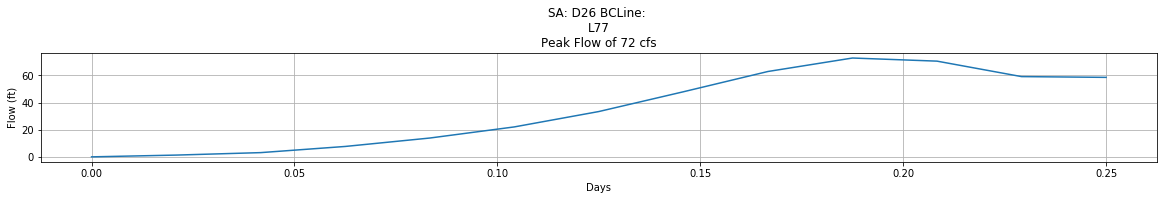

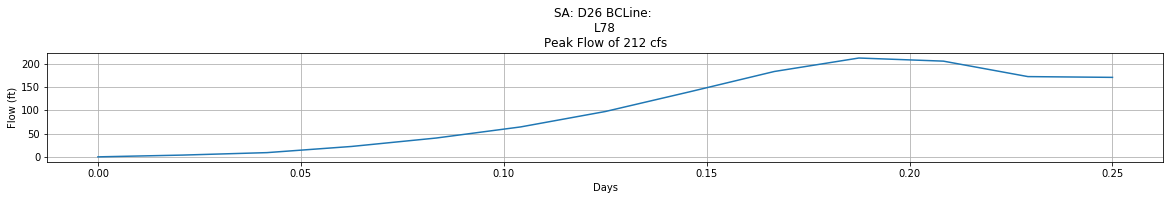

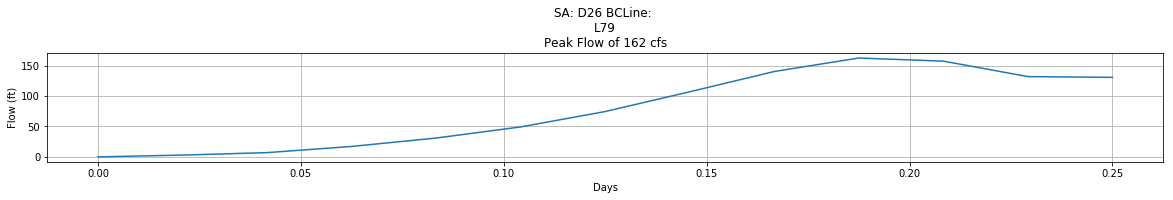

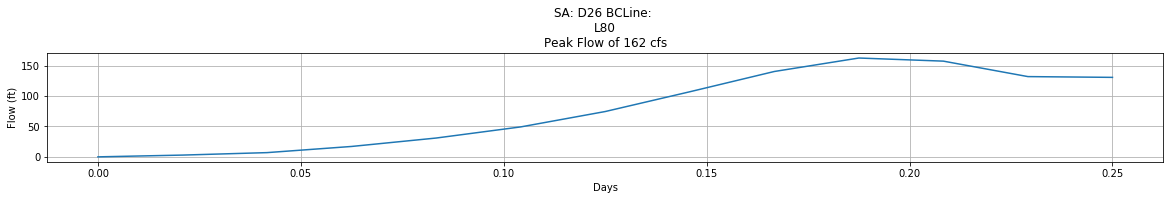

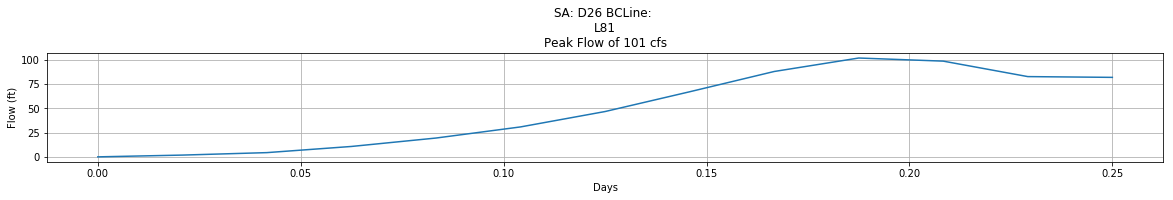

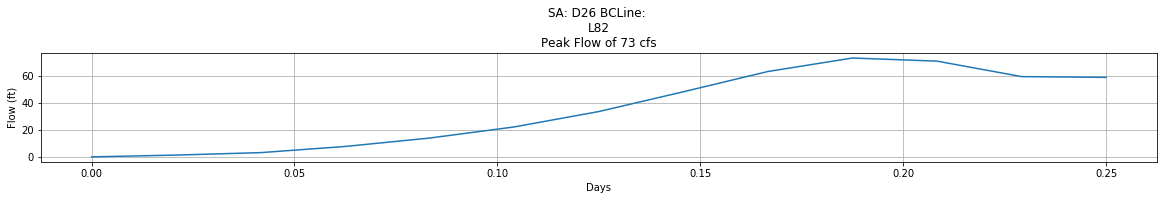

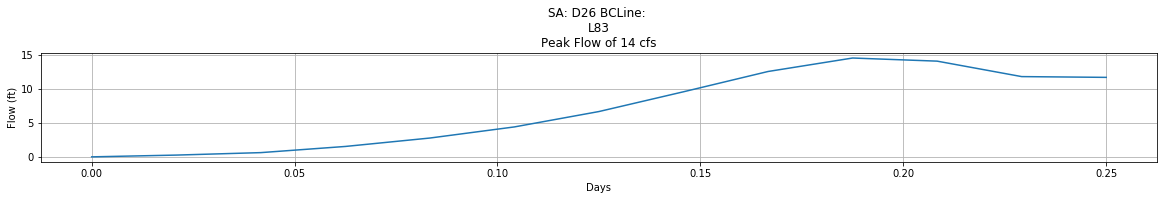

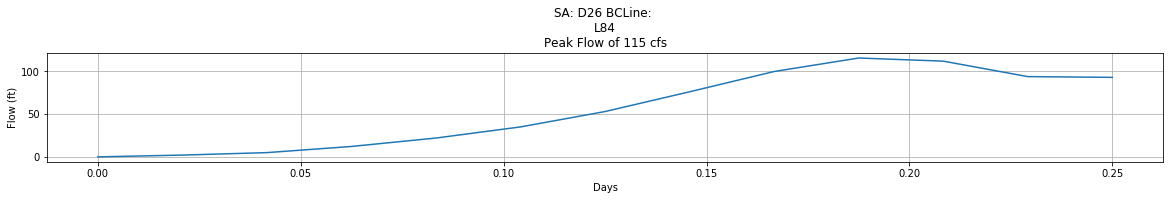

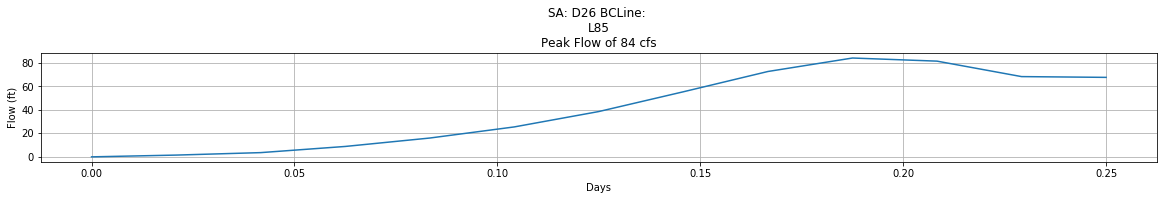

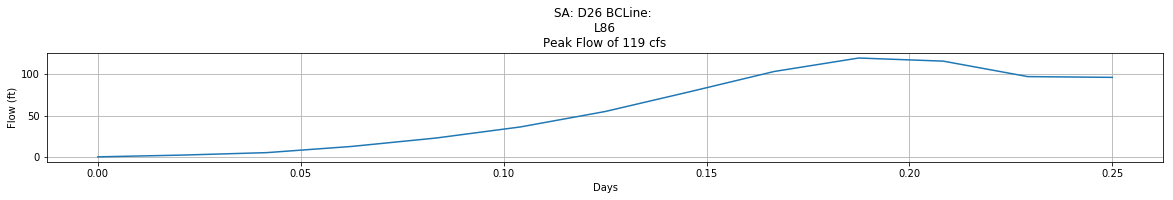

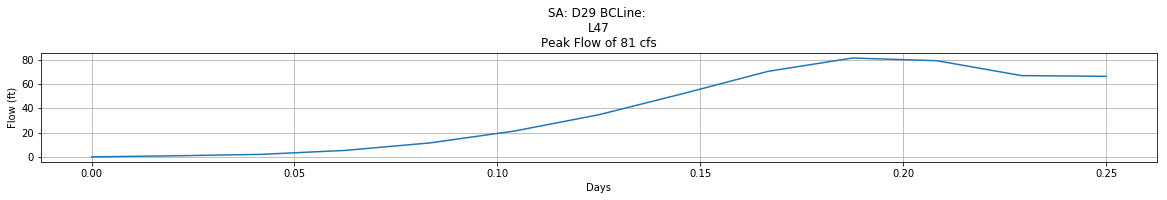

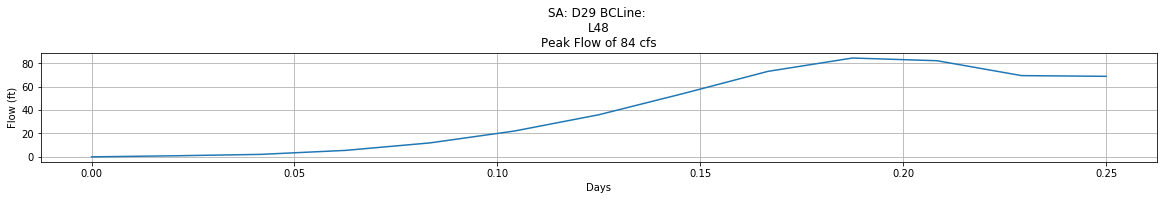

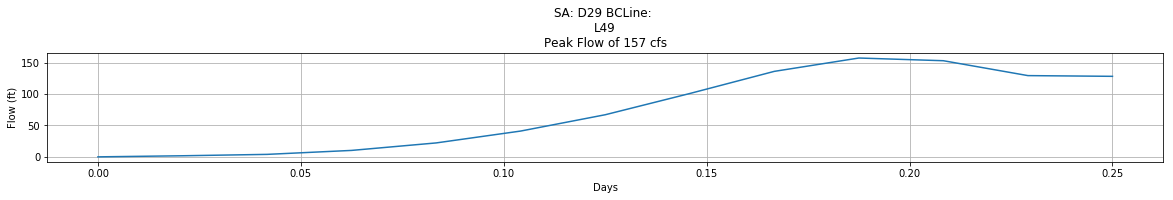

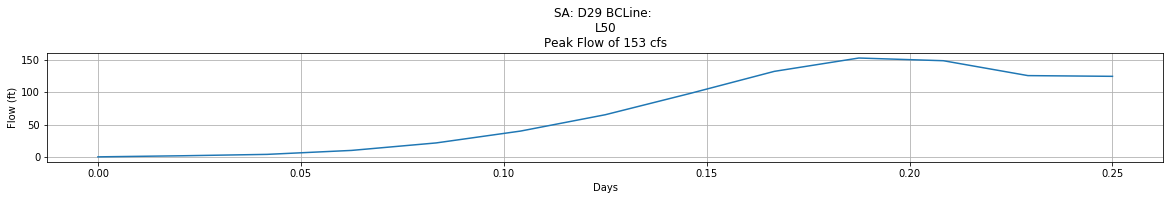

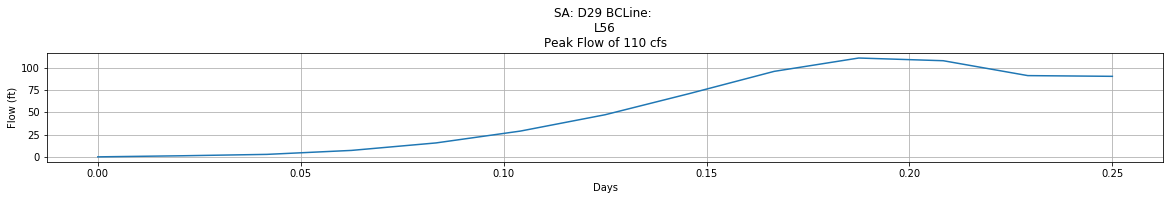

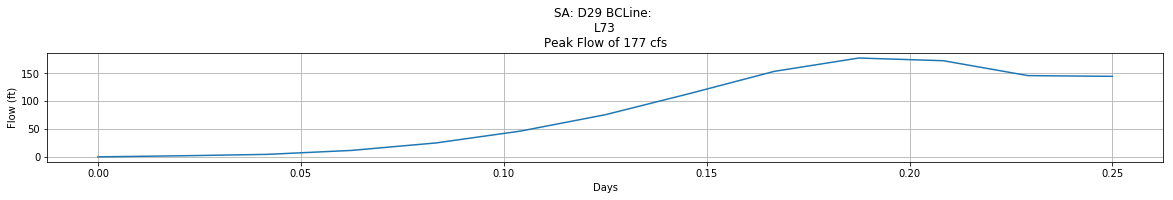

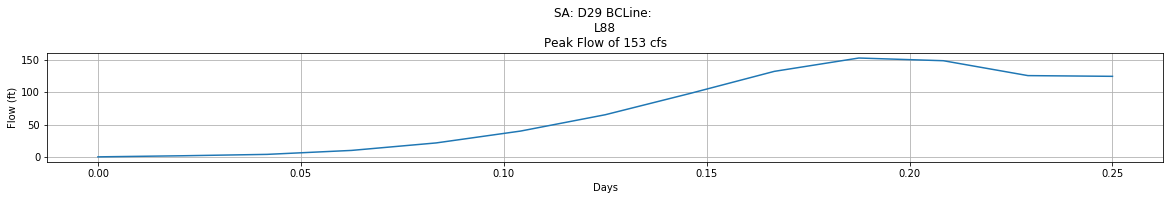

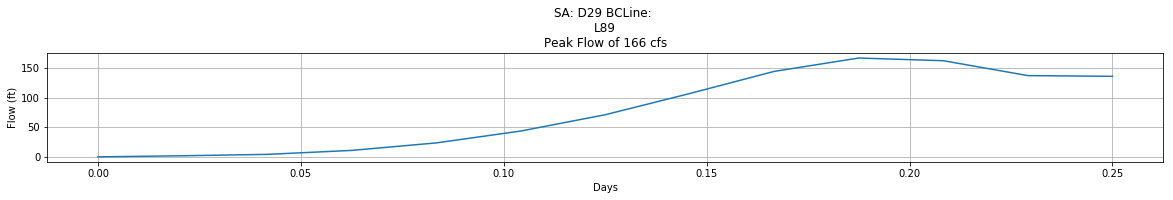

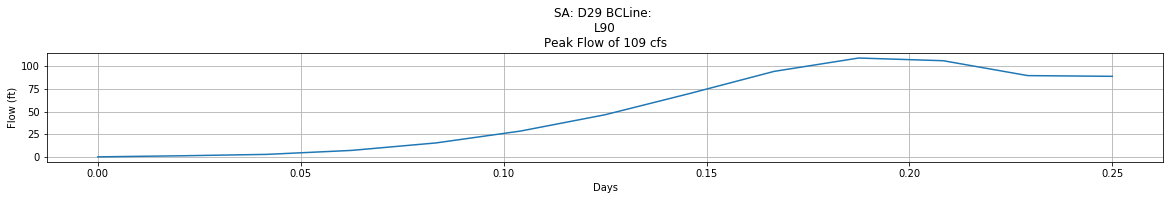

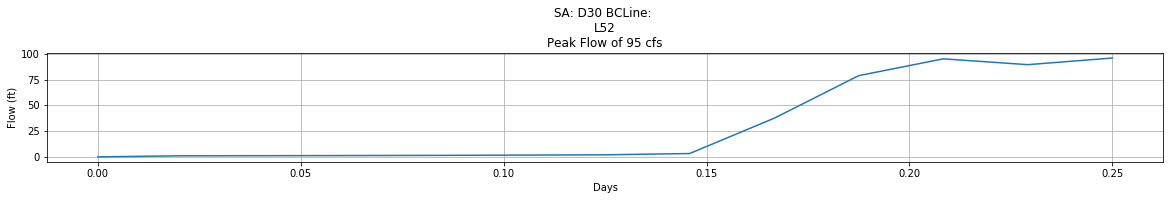

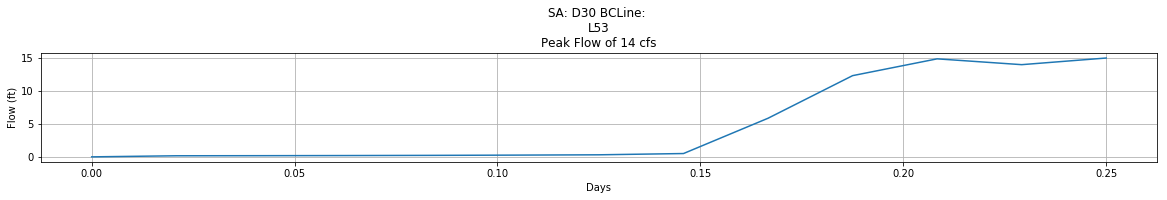

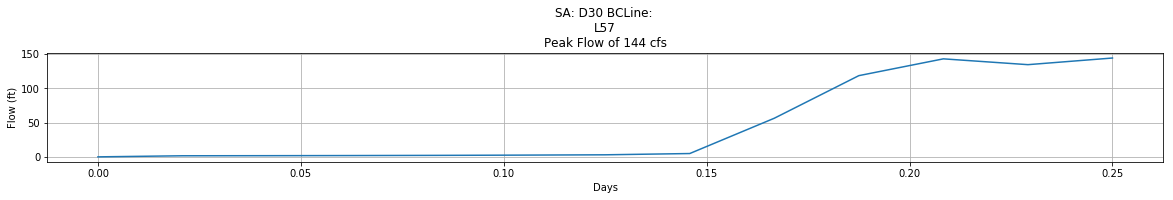

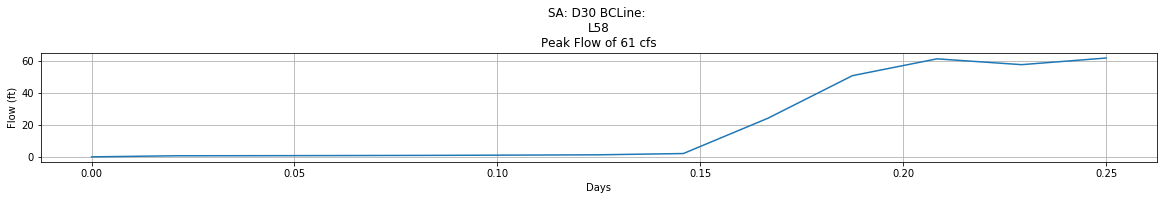

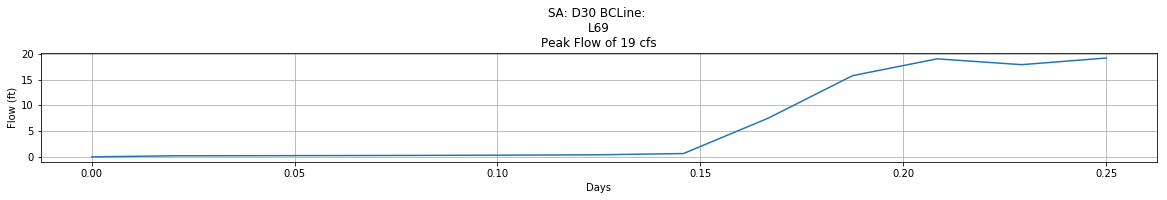

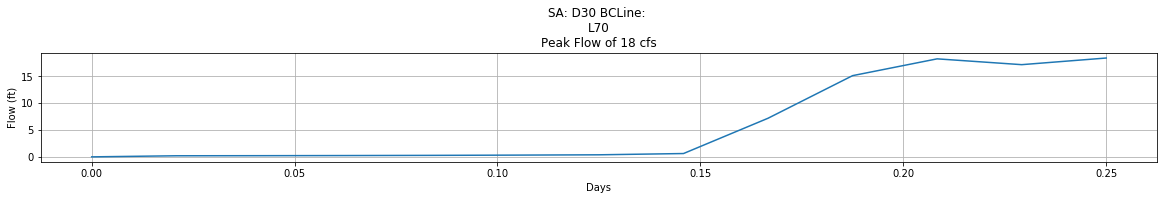

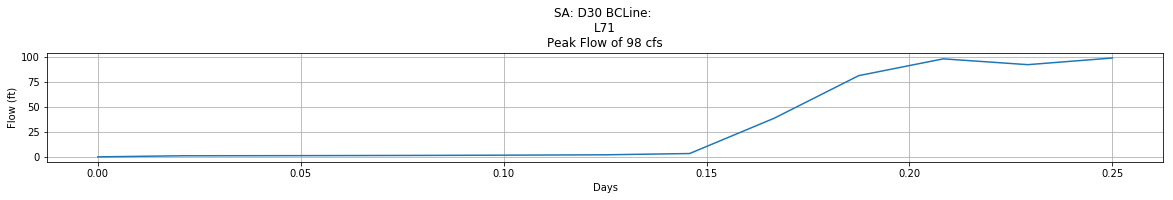

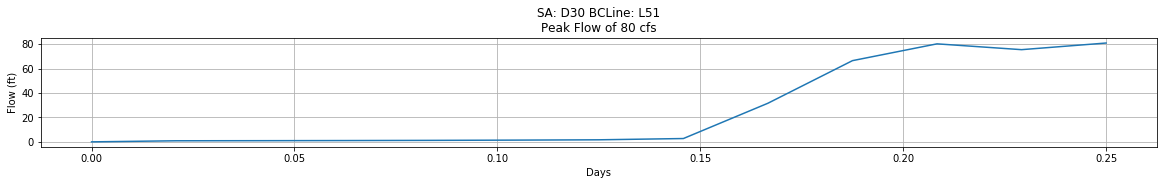

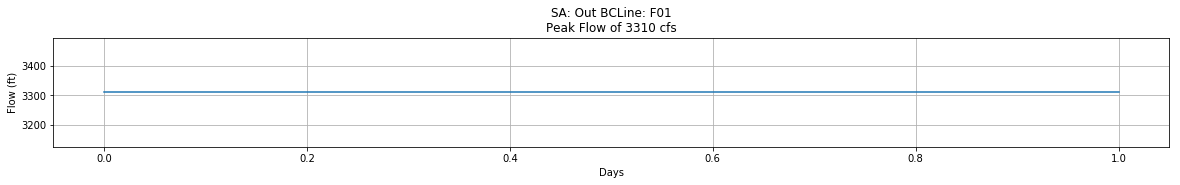

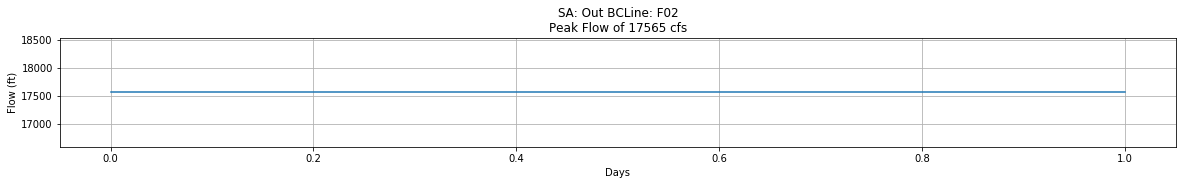

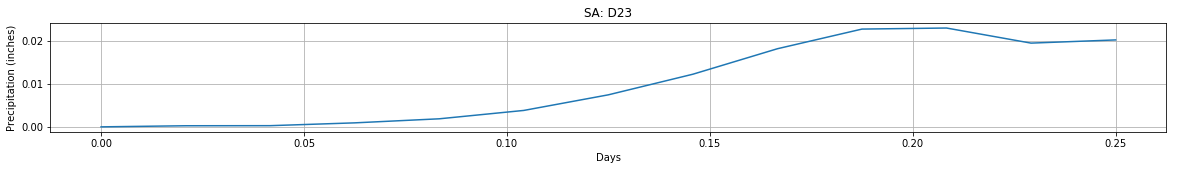

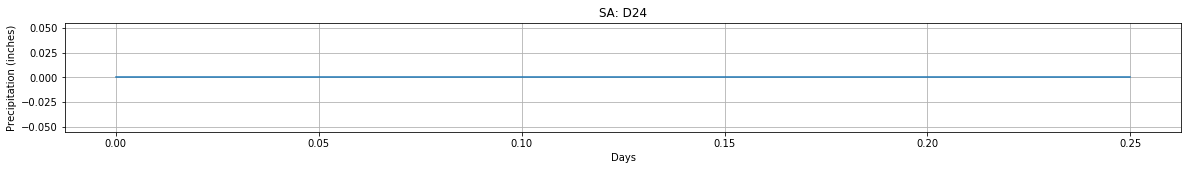

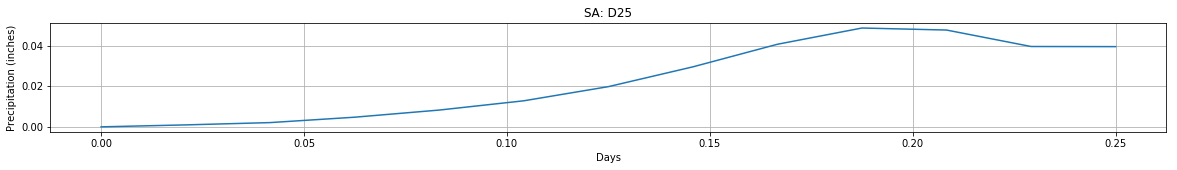

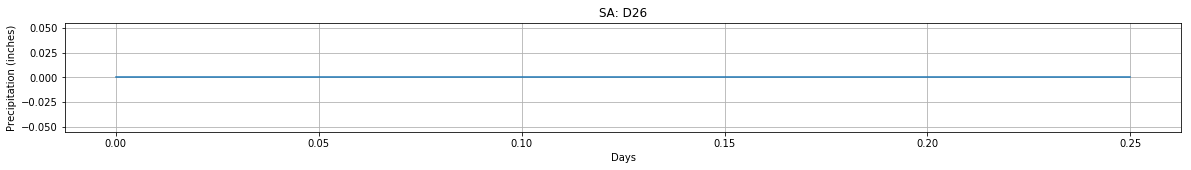

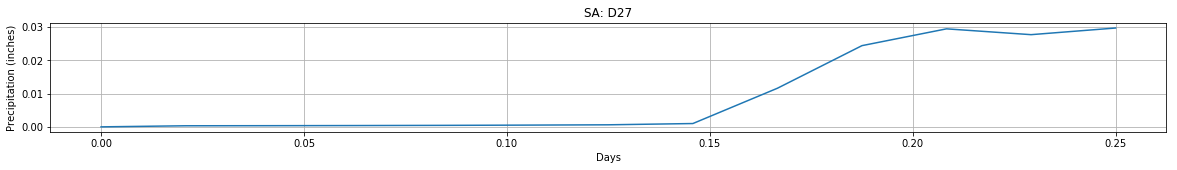

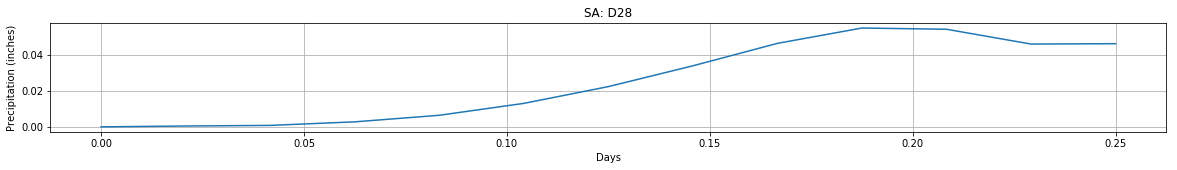

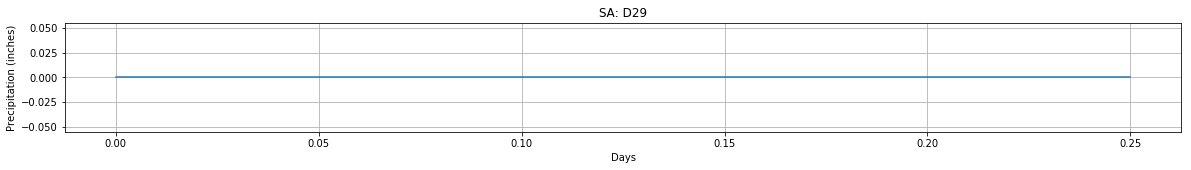

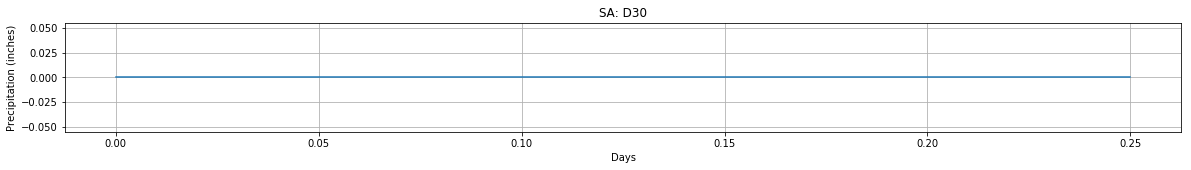

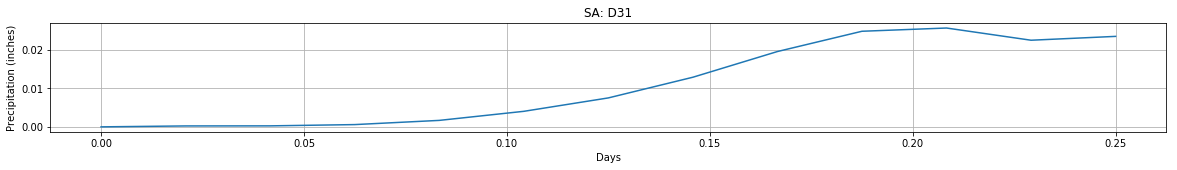

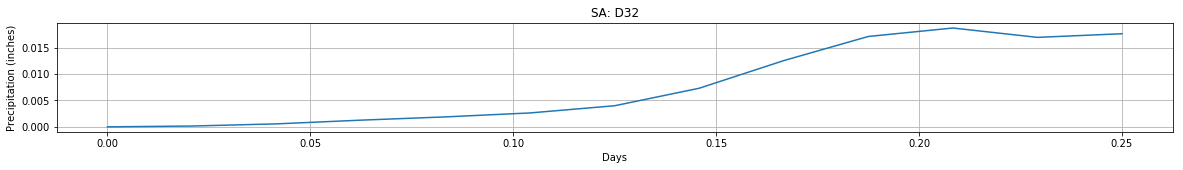

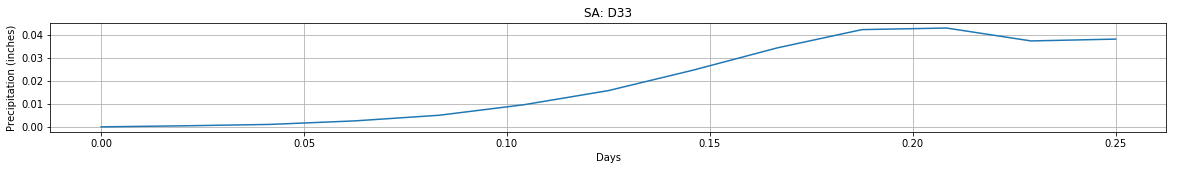

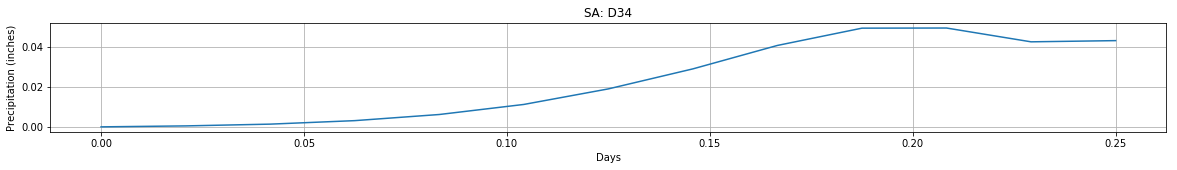

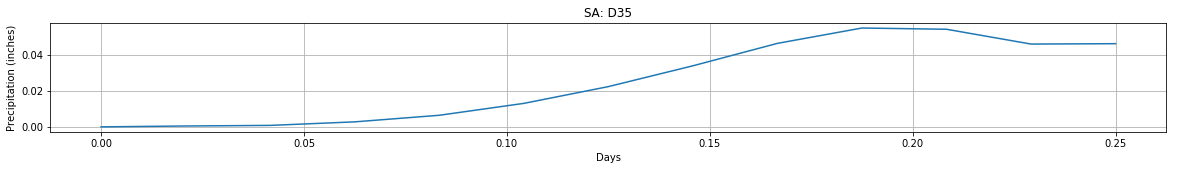

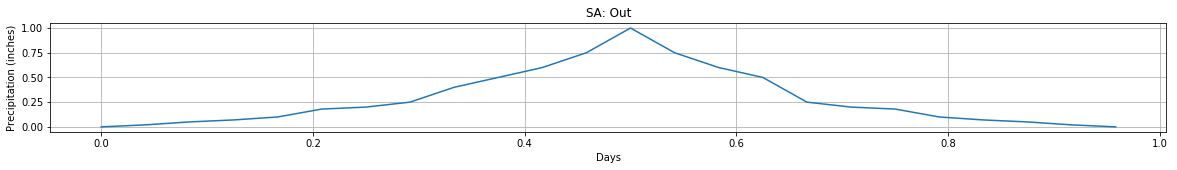

In [9]:
for domainID in rasPlan.domains:
    results = DomainResults(model, rasPlan, domainID)

plotBCs(results)

### 2A. Computational Summary

In [10]:
rasPlan.summary

,Results
Computation Time DSS,00:00:02
Computation Time Total,02:54:27
Maximum WSEL Error,0
Run Time Window,15AUG2019 18:32:45 to 15AUG2019 21:27:09
Solution,Unsteady Finished Successfully
Time Solution Went Unstable,NaN
Time Stamp Solution Went Unstable,Not Applicable
Vol Accounting,Volume Accounting in Acre Feet
Vol Accounting 2D Bdry,0
Vol Accounting Cell End,60303


### 2A. Depth Plots

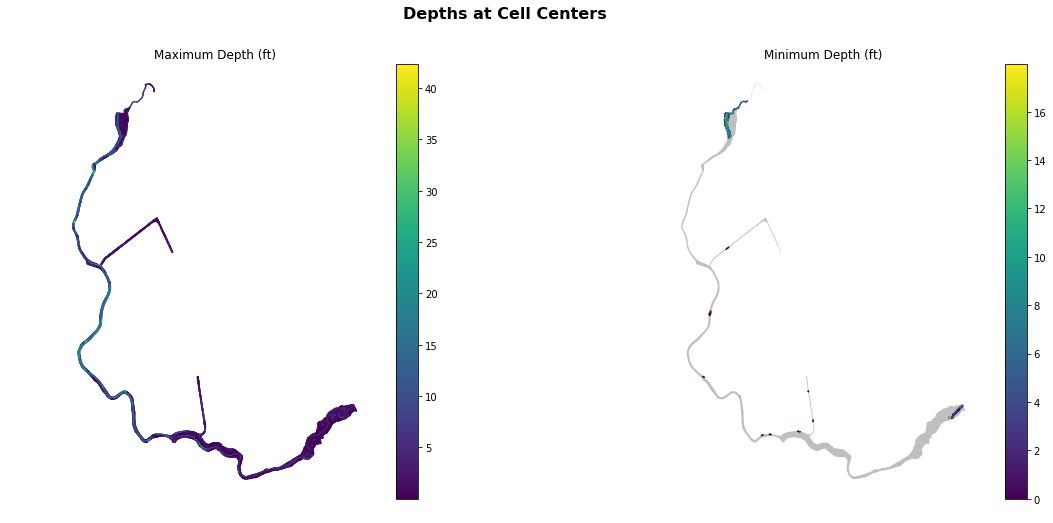

In [11]:
plot_descriptive_stats(results.Describe_Depths, results.Perimeter)

### Local development test

In [13]:
rasPlan = HDFResultsFile(model, hdfResults_path)
rasPlan.domain_polys

,geometry
0,"POLYGON ((6789053.064 2010928.645, 6789063.544..."
1,"POLYGON ((6738450.706 1997488.341, 6738899.035..."
2,"POLYGON ((6711228.869 2004724.175, 6711237.55 ..."
3,"POLYGON ((6738185.107 1969289.75, 6738534.277 ..."
4,"POLYGON ((6668819.02688378 2007494.68421841, 6..."
5,"POLYGON ((6689352.38038801 1997113.62117748, 6..."
6,"POLYGON ((6689039.45888592 1998045.53028427, 6..."
7,"POLYGON ((6729540.481 1966635.629, 6729911.675..."
8,"POLYGON ((6829307.553 2102176.17, 6829174.25 2..."
9,"POLYGON ((6764828.78286272 2130506.13389601, 6..."


###  2B. Domain Extents
*Boundary Condition locations should be the only areas shown

In [ ]:
plot_extreme_edges(results.Extreme_Edges, results.Perimeter, rasPlan.domain_polys)

###  2C. High Velocities at cell faces

In [ ]:
velCheckMain(results, plot_tseries=3)

# END